In [22]:
#Multi Layer Perceptron
##Loading Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
##Loading paint dataset
def paint_dataset():
    sample_dataset=plt.imread("C:\\Users\\TALYXD\\Desktop\\Sample Dataset 6.jpg")
    sample_dataset=sample_dataset.astype(float)
    index2=sample_dataset[:,:,2]-sample_dataset[:,:,0]
    ##Purple
    n1=np.where(index2>(50))
    y1=np.zeros((n1[0].shape[0],1))
    ##Yellow
    n0=np.where(index2<-50)
    y2=np.ones((n0[0].shape[0],1))
    #Combine Y purple and yellow
    Y=np.concatenate((y1,y2)).reshape(n1[0].shape[0]+n0[0].shape[0],1)
    #Combine data points to X
    n1=np.stack((n1[1],n1[0]))
    n0=np.stack((n0[1],n0[0]))
    X=np.hstack((n1,n0))
    #Shuffling dataset 
    X_Train, X_Test, Y_Train, Y_Test  = train_test_split(X.transpose(), Y, test_size=0.33, random_state=42)
    #Return 1000 dataset for training and 500 for testing
    return(X_Train[0:1000,:].T, Y_Train[0:1000].T, X_Test[0:500,:].T, Y_Test[0:500].T)

class MLP:
    def __init__(self,lr,epoch,mlp_size):
        ##Setting fix variable 
        self.input_size=mlp_size[0]
        self.hidden_size1=mlp_size[1]
        self.hidden_size2=mlp_size[2]
        self.output_size=mlp_size[3]
        self.epoch=epoch
        self.lr=lr   
        self.RandomState=np.random.seed(61000)
        ##Initialize weights 
        self.w0=np.random.normal(0,1,(self.hidden_size1,self.input_size))
        self.b0=np.random.normal(0,1,(self.hidden_size1,1))
        self.w1=np.random.normal(0,1,(self.hidden_size2,self.hidden_size1))
        self.b1=np.random.normal(0,1,(self.hidden_size2,1))
        self.w2=np.random.normal(0,1,(self.output_size,self.hidden_size2))
        self.b2=np.random.normal(0,1,(self.output_size,1))
    
    #Forward Propagation
    def forward(self,X):
        self.z1=np.dot(self.w0,X)+self.b0
        self.a1=self.sigmoid(self.z1)
        self.z2=np.dot(self.w1,self.a1)+self.b1
        self.a2=self.sigmoid(self.z2)
        self.z3=np.dot(self.w2,self.a2)+self.b2
        self.y_hat=self.sigmoid(self.z3)
        return(self.y_hat)
    #Sigmoid function
    def sigmoid(self,X):
        return(1/(1+np.exp(-X)))
    #Derivative of Sigmoid
    def sig_der(self,X):
        return(np.multiply(self.sigmoid(X),(1-self.sigmoid(X))))
    #Average Loss function / Cost function per batch
    def cost_bce(self,y, y_hat):
        cost=[]
        n=y_hat.shape[1]
        for i in range(n):
            if y[0,i]==1:
                cost.append(-np.log(y_hat[0,i]))
            else:
                cost.append(-np.log(1-y_hat[0,i]))
        return 1/n*sum(np.array(cost))
    #Backpropagation
    def Train(self,X,Y):
        n=X.shape[1]
        LOSS=[]
        for i in range(self.epoch):
            if i%500==0:
                print('epoch: '+str(i))
            y_hat=self.forward(X)
            #Cost/Loss 
            loss=self.cost_bce(Y,y_hat)
            LOSS.append(loss)
            #W2
            #dA2
            ##########Classification with sigmoid and BCE
            delta_3=(y_hat-Y)
            # dW2
            dw2= (1/n)*np.matmul(delta_3, self.a2.transpose())
            # db2
            db2= (1/n)*np.sum(delta_3, axis=1,keepdims=True)

            #W1
            #dA1
            delta_2=np.multiply(self.sig_der(self.z2),np.matmul(self.w2.transpose(),delta_3))
            #dW1 
            dw1=(1/n)*np.matmul(delta_2,self.a1.transpose())
            #db1
            db1=(1/n)*np.sum(delta_2,axis=1,keepdims=True)

            #W0
            #dA0
            delta_1=np.multiply(self.sig_der(self.z1),np.matmul(self.w1.transpose(),delta_2))
            #dW0
            dw0=(1/n)*np.matmul(delta_1,X.transpose())
            #db0
            db0=(1/n)*np.sum(delta_1,axis=1,keepdims=True)
            
            #Update the weights
            self.w0=self.w0-self.lr*dw0 
            self.b0=self.b0-self.lr*db0
            self.w1=self.w1-self.lr*dw1 
            self.b1=self.b1-self.lr*db1
            self.w2=self.w2-self.lr*dw2
            self.b2=self.b2-self.lr*db2
        return(LOSS)
        


In [24]:
##########################################################
#Training and Testing with variation of learning rate and hidden neurons (Classification)
# ############################################################

#Learning Rate
learning_rate=[0.1,0.5,1]
#Loop for learning rate
for j in learning_rate:
    #Loading data
    X_Train, Y_Train, X_Test, Y_Test = paint_dataset()
    Accuracy_Testing=[]
    #Hidden Neurons (hidden layer 1 and 2 has the same hidden neurons)
    hidden_neurons=[5,25,50,100]

    for i in hidden_neurons:
        #Printing the hidden neuron and learning rate
        print('hidden_neurons: '+str(i)+' and learning rate: '+str(j))
        epoch = 3000
        #Initialize the Model 
        Model=MLP(j,limit,[2,i,i,1])
        #Forward Propagation
        predict=Model.forward(X_Train)
        #Back Propagation
        LOSS=Model.Train(X_Train,Y_Train)
        # Predict the test result 
        predict=Model.forward(X_Test)
        ###Test 
        acc_test=np.sum((Y_Test==(predict>0.5)*1)*1)/Y_Test.shape[1]
        Accuracy_Testing.append(acc_test)

    #Printing the Accuracy of testing for each learning rate
    print(Accuracy_Testing)
    plt.figure(4)
    plt.plot(hidden_neurons,Accuracy_Testing)
    plt.xlabel('Number of hidden neurons')
    plt.ylabel('Accuracy') 
    plt.title('Accuracy vs Number of hidden neurons')
    plt.ylim([0, 1])
    plt.show()



hidden_neurons: 5 and learning rate: 0.1
epoch: 0
epoch: 500
epoch: 1000


C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in exp


epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 25 and learning rate: 0.1
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000


KeyboardInterrupt: 

C:\Users\TALYXD\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in exp


epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


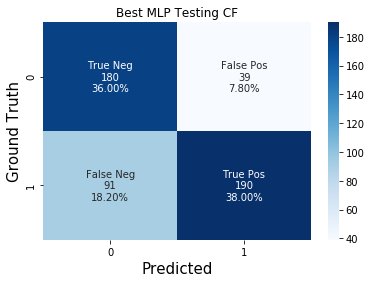

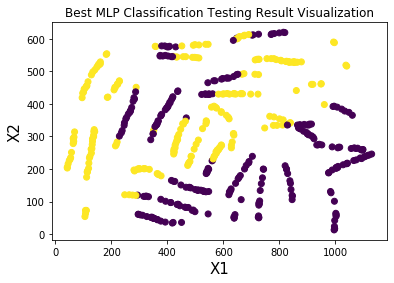

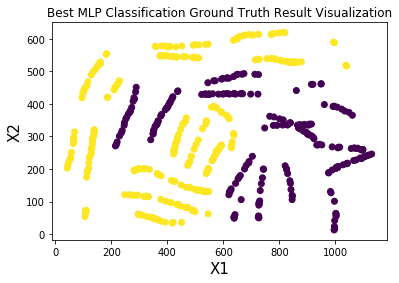

In [26]:
##Best Result 
#Loading paint classification dataset
X_Train, Y_Train, X_Test, Y_Test = paint_dataset()
#Parameter for best result model
epoch = 3000
lr=0.1
hidden_neurons=50
input_data=2
output_data=1
#Initialization
Model=MLP(lr,epoch,[input_data,hidden_neurons,hidden_neurons,output_data])
#Forward Propagation
predict=Model.forward(X_Train)
#Back Propagation
LOSS=Model.Train(X_Train,Y_Train)
#Predicting testing dataset
predict2=Model.forward(X_Test)
#Changing prediction to 1 and 0
predicttest=((predict2>0.5)*1).reshape(-1)
Y_Test2=Y_Test.reshape(-1)

##Testing confusion matrix 
testcm=confusion_matrix(Y_Test2,predicttest)
##Testing Visualization confusion matrix 
plt.figure(1)
plt.title('Best MLP Testing CF')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                testcm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     testcm.flatten()/np.sum(testcm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(testcm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Ground Truth', fontsize = 15) # y-axis label with fontsize 15
plt.show()

#Visualizing predict test data
predict2=predict2.reshape(Y_Test.shape[1])
plt.figure(4)
plt.title('Best MLP Classification Testing Result Visualization')
plt.scatter(X_Test[0,:],X_Test[1,:],c=(predict2>0.5))
plt.xlabel('X1', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('X2', fontsize = 15) # y-axis label with fontsize 15
plt.show()

#Visualizing the ground truth testing data
Y_Test=Y_Test.reshape(Y_Test.shape[1])
plt.figure(5)
plt.title('Best MLP Classification Ground Truth Result Visualization')
plt.scatter(X_Test[0,:],X_Test[1,:],c=(Y_Test>0.5))
plt.xlabel('X1', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('X2', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [27]:
#Multi Layer Perceptron
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Simulating regression data 
def simulated_regression_data():
    X = np.linspace(-10, 10, num=1500)
    Y = 0.1*X*np.cos(X) + 0.1*np.random.normal(size=1500)
    X, Y = shuffle(X,Y)
    X_Train=X[0:1000]
    X_Test=X[1000:1500]
    Y_Train=Y[0:1000]
    Y_Test=Y[1000:1500]
    return X_Train.reshape(1,-1), Y_Train.reshape(1,-1), X_Test.reshape(1,-1), Y_Test.reshape(1,-1)

class MLP:
    def __init__(self,lr,epoch,mlp_size):
        ##Setting fix variable
        self.input_size=mlp_size[0]
        self.hidden_size1=mlp_size[1]
        self.hidden_size2=mlp_size[2]
        self.output_size=mlp_size[3]
        self.epoch=epoch
        self.lr=lr   
        self.RandomState=np.random.seed(61000)
        ##Initialize weights 
        self.w0=np.random.normal(0,1,(self.hidden_size1,self.input_size))
        self.b0=np.random.normal(0,1,(self.hidden_size1,1))
        self.w1=np.random.normal(0,1,(self.hidden_size2,self.hidden_size1))
        self.b1=np.random.normal(0,1,(self.hidden_size2,1))
        self.w2=np.random.normal(0,1,(self.output_size,self.hidden_size2))
        self.b2=np.random.normal(0,1,(self.output_size,1))
    #Regression forward propagation
    def forward(self,X):
        self.z1=np.dot(self.w0,X)+self.b0
        self.a1=self.sigmoid(self.z1)
        self.z2=np.dot(self.w1,self.a1)+self.b1
        self.a2=self.sigmoid(self.z2)
        self.z3=np.dot(self.w2,self.a2)+self.b2
        self.y_hat=self.relu(self.z3)
        return(self.y_hat)
    #Sigmoid function
    def sigmoid(self,X):
        return(1/(1+np.exp(-X)))
    #sigmoid derivative function
    def sig_der(self,X):
        return(np.multiply(self.sigmoid(X),(1-self.sigmoid(X))))
    #ReLU function
    def relu(self,X):
        X[X<0]=0
        return(X)
    #ReLU derivative function
    def relu_der(self,X):
        A=np.zeros((X.shape[0],X.shape[1]))
        A[X>0]=1
        A[X<=0]=0
        return(A)
    #Average Cost /Loss function
    def cost_mse(self,y,y_hat):
        return(np.mean((y-y_hat)**2))
    
    def Train(self,X,Y):
        n=X.shape[1]
        LOSS=[]
        for i in range(self.epoch):
            if i%500==0:
                print('epoch: '+str(i))
            y_hat=self.forward(X)
            #Regression
            loss=self.cost_mse(Y,y_hat)
            LOSS.append(loss)
            #W2
            #dA2
            ########Regression with Relu and MSE
            delta_3=(y_hat-Y)*(self.relu_der(self.z3))
            # dW2
            dw2= (1/n)*np.matmul(delta_3, self.a2.transpose())
            # db2
            db2= (1/n)*np.sum(delta_3, axis=1,keepdims=True)

            #W1
            #dA1
            delta_2=np.multiply(self.sig_der(self.z2),np.matmul(self.w2.transpose(),delta_3))
            #dW1 
            dw1=(1/n)*np.matmul(delta_2,self.a1.transpose())
            #db1
            db1=(1/n)*np.sum(delta_2,axis=1,keepdims=True)

            #W0
            #dA0
            delta_1=np.multiply(self.sig_der(self.z1),np.matmul(self.w1.transpose(),delta_2))
            #dW0
            dw0=(1/n)*np.matmul(delta_1,X.transpose())
            #db0
            db0=(1/n)*np.sum(delta_1,axis=1,keepdims=True)
            #Update the weights
            self.w0=self.w0-self.lr*dw0 
            self.b0=self.b0-self.lr*db0
            self.w1=self.w1-self.lr*dw1 
            self.b1=self.b1-self.lr*db1
            self.w2=self.w2-self.lr*dw2
            self.b2=self.b2-self.lr*db2
        return(LOSS)
        


hidden_neurons: 5 and learning rate: 0.05
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 25 and learning rate: 0.05
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 50 and learning rate: 0.05
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 100 and learning rate: 0.05
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


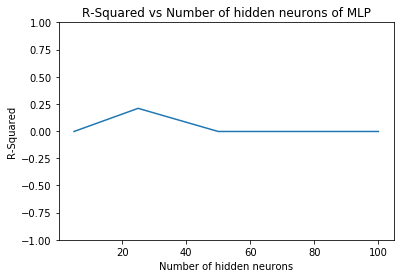

hidden_neurons: 5 and learning rate: 0.1
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 25 and learning rate: 0.1
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 50 and learning rate: 0.1
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 100 and learning rate: 0.1
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


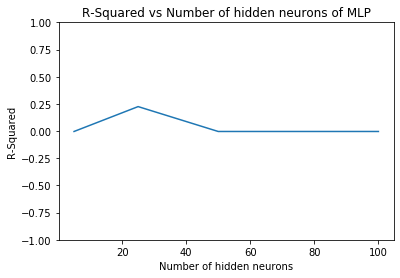

hidden_neurons: 5 and learning rate: 0.3
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 25 and learning rate: 0.3
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 50 and learning rate: 0.3
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500
hidden_neurons: 100 and learning rate: 0.3
epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


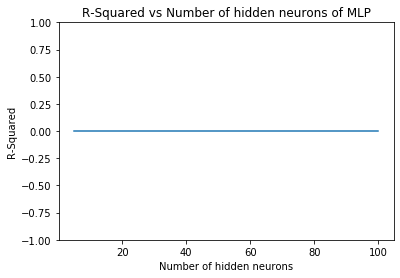

In [29]:
#Loading Data
##########################################################
X_Train, Y_Train, X_Test, Y_Test=simulated_regression_data()
# ############################################################
#Learning rate variation
learning_rate=[0.05,0.1,0.3]
for j in learning_rate:
    #hidden neurons variation
    hidden_neurons=[5,25,50,100]
    #List of R_Squared
    R_SQUARE=[]
    for i in hidden_neurons:
        print('hidden_neurons: '+str(i)+' and learning rate: '+str(j))
        epoch= 3000
        #Initialization
        Model=MLP(j,epoch,[1,i,i,1])
        #Forward Propagation
        predict=Model.forward(X_Train)
        #Back Propagation
        LOSS=Model.Train(X_Train,Y_Train)
        #Predicting test result
        predict2=Model.forward(X_Test)
        #Reshaping Ground Truth and test prediction
        Y_Test_2=Y_Test.reshape(-1)
        predict22=predict2.reshape(-1)
        #Generating R_Squared
        R_SQUARE.append(r2_score(Y_Test_2,predict22))

    #Plotting the R_Squared vs number of hidden neurons
    plt.figure(11)
    ax = plt.gca()
    plt.plot(hidden_neurons,R_SQUARE)
    ax.set_ylim([-1, 1])
    plt.xlabel('Number of hidden neurons')
    plt.ylabel('R-Squared')
    plt.title('R-Squared vs Number of hidden neurons of MLP')
    plt.show()



epoch: 0
epoch: 500
epoch: 1000
epoch: 1500
epoch: 2000
epoch: 2500


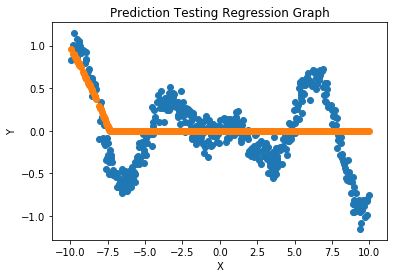

In [31]:
#Best Result 
##########################################################
X_Train, Y_Train, X_Test, Y_Test=simulated_regression_data()
# ############################################################

#Initialize Parameters
learning_rate=0.1
hidden_neurons=25
input_data=1
output_data=1
epoch=3000
#Initialize the Model
Model=MLP(learning_rate,epoch,[input_data,hidden_neurons,hidden_neurons,output_data])
#Forward Propagation
predict=Model.forward(X_Train)
#Back Propagation
LOSS=Model.Train(X_Train,Y_Train)
#Predicting the testing dataset
predict2=Model.forward(X_Test)

#Ploting the testing dataset and the prediction
plt.figure(3)
plt.title('Prediction Testing Regression Graph')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X_Test,Y_Test)
plt.scatter(X_Test,predict2)
plt.show()
